In [2]:
%load_ext autoreload
%autoreload 2

# Imports

In [69]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
from dataloading import get_labeled_data

# Load the data

In [35]:
# file paths
train_path = "../data/preprocessed/train_vectors.csv"
scaled_train_path = "../data/preprocessed/train_vectors_scaled.csv"
valid_path = "../data/preprocessed/validation_vectors.csv"
scaled_valid_path = "../data/preprocessed/validation_vectors_scaled.csv"

In [90]:
# load the dataframes
train_df = pd.read_csv(train_path)
train_df_scaled = pd.read_csv(scaled_train_path)
valid_df = pd.read_csv(valid_path)
valid_df_scaled = pd.read_csv(scaled_valid_path)

In [91]:
# using the not scaled dataframe
train_df.head()

,Port number,Packet speed,Data speed,Avg packet len,Source IP count,victim IP num,time_of_day,Significant flag,CLDAP,Generic UDP,...,IPv4 fragmentation,Suspicious traffic,SSDP,TCP Anomaly,SNMP,DNS,is_weekday,Type,is_synthetic,other_attack_codes
0,4500,55600,73,1383,6,1,65376,0,0,0,...,0,0,0,0,0,0,1,Normal traffic,False,0
1,4500,63500,90,1506,1,2,67048,0,0,0,...,0,0,0,0,0,0,1,Normal traffic,False,0
2,1200,59700,79,1399,1,3,67285,0,0,0,...,0,0,0,0,0,0,1,Normal traffic,False,0
3,1200,65700,86,1399,1,3,67286,0,0,0,...,0,0,0,0,0,0,1,Normal traffic,False,0
4,4500,59500,85,1486,1,2,67669,0,0,0,...,0,0,0,0,0,0,1,Normal traffic,False,0


In [111]:
# get target features
train_df_scaled = train_df_scaled[train_df_scaled['is_synthetic'] == False]
data_df = train_df_scaled.drop(columns=['is_synthetic','Type'])
data_df = data_df.reindex(sorted(data_df.columns), axis=1)
target_df = train_df_scaled['Type']

# encode target labels
target_label_encoder = LabelEncoder()
target_label_encoder.fit(target_df)
target_df = target_label_encoder.transform(target_df)

X = data_df.to_numpy()
y = target_df

In [120]:
# train - test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9493646072156074


In [123]:
from sklearn.metrics import classification_report
# Predict on the testing data
y_pred = rf_classifier.predict(X_test)

target_names = target_label_encoder.inverse_transform([0,1,2])

print(classification_report(y_test, y_pred, target_names=target_names))

                    precision    recall  f1-score   support

       DDoS attack       0.97      0.99      0.98     15796
    Normal traffic       0.95      0.99      0.97     89883
Suspicious traffic       0.86      0.59      0.70     11650

          accuracy                           0.95    117329
         macro avg       0.93      0.86      0.88    117329
      weighted avg       0.95      0.95      0.95    117329



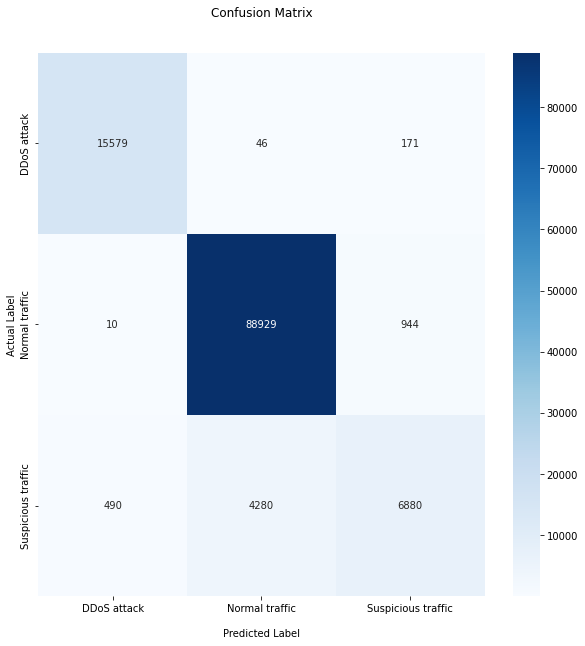

In [125]:
cf_matrix = confusion_matrix(y_test, y_pred)

fig = plt.figure(figsize=(10,10))

class_names = target_label_encoder.inverse_transform([0,1,2])

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt = 'd', xticklabels=class_names, yticklabels=class_names)

ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Label')
ax.set_ylabel('Actual Label')

## Display the visualization of the Confusion Matrix.
plt.show()

In [126]:
# get target features
data_df = valid_df_scaled.drop(columns=['Type'])
data_df = data_df.reindex(sorted(data_df.columns), axis=1)
target_df = valid_df_scaled['Type']

# encode target labels
target_df = target_label_encoder.transform(target_df)

X_valid = data_df.to_numpy()
y_valid = target_df

In [127]:
data_df.head()

,Avg packet len,CHARGEN,CLDAP,CoAP,DNS,Data speed,Generic UDP,High volume traffic,IPv4 fragmentation,NTP,...,SSDP,SYN Attack,Significant flag,Source IP count,Suspicious traffic,TCP Anomaly,is_weekday,other_attack_codes,time_of_day,victim IP num
0,0.978049,0,0,0,0,-0.106046,0,1,0,0,...,0,0,0,-0.191742,0,0,1,0,0.587423,10.287790
1,0.790984,0,0,0,0,0.032628,0,1,0,0,...,0,0,0,-0.191742,0,0,1,0,0.588958,11.541849
2,0.956042,0,0,0,0,-0.089731,0,1,0,0,...,0,0,0,-0.191742,0,0,1,0,0.589353,10.287790
3,0.576409,0,0,0,0,0.106043,0,1,0,0,...,0,0,0,-0.191742,0,0,1,0,0.589484,10.367687
4,0.565405,0,0,0,0,-0.130518,0,1,0,0,...,0,0,0,-0.191742,0,0,1,0,0.589484,10.367687


In [128]:
y_pred = rf_classifier.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7094356777142967


In [129]:
print(classification_report(y_valid, y_pred, target_names=target_names))

                    precision    recall  f1-score   support

       DDoS attack       0.29      0.09      0.13    305167
    Normal traffic       0.76      0.93      0.84    919196
Suspicious traffic       0.05      0.07      0.06     22903

          accuracy                           0.71   1247266
         macro avg       0.37      0.36      0.34   1247266
      weighted avg       0.63      0.71      0.65   1247266



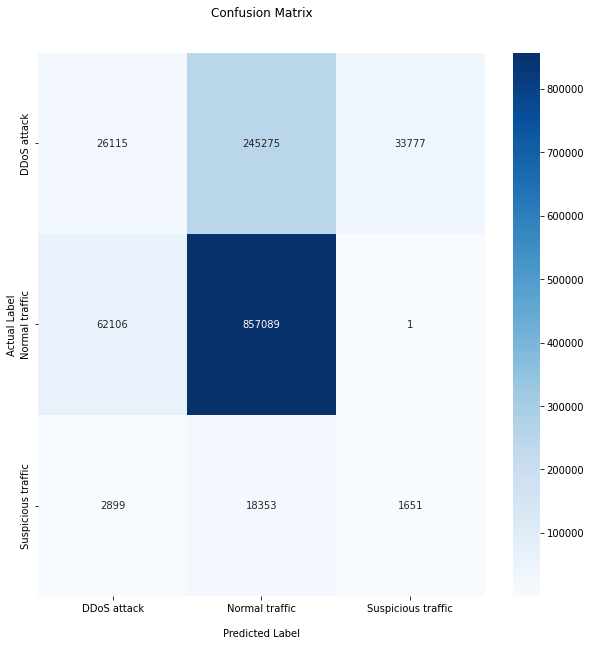

In [130]:
import seaborn as sns 

cf_matrix = confusion_matrix(y_valid, y_pred)

fig = plt.figure(figsize=(10,10))

class_names = target_label_encoder.inverse_transform([0,1,2])

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt = 'd', xticklabels=class_names, yticklabels=class_names)

ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Label')
ax.set_ylabel('Actual Label')

## Display the visualization of the Confusion Matrix.
plt.show()